In [81]:
!pip install qiskit

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [82]:
!pip install qiskit-aer

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [29]:
!pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [268]:
# Importing necessary libraries and modules
import numpy as np  # Importing the numpy library for numerical operations
from qiskit import QuantumCircuit, assemble, Aer, execute, QuantumRegister, ClassicalRegister  # Importing necessary classes and functions from qiskit
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_bloch_vector, plot_state_qsphere, plot_state_city, plot_state_hinton, plot_gate_map, plot_error_map, array_to_latex  # Importing visualization functions from qiskit
from qiskit.circuit import Gate  # Importing the Gate class from qiskit.circuit module
from math import pi  # Importing the constant pi from the math module
from qiskit.quantum_info import Statevector


# Setting up the backend for simulation
sim = Aer.get_backend('aer_simulator')  # Setting up the Aer simulator backend


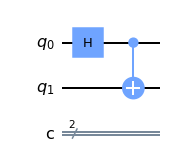

In [163]:
psi_pos = QuantumCircuit(2,2)
psi_pos.h(0)
psi_pos.cx(0,1)
psi_pos.draw('mpl')

In [251]:
# Define the initial quantum states
qc_zero = [1, 0]  # Quantum state representing |0>
qc_one = [0, 1]  # Quantum state representing |1>

def bell_states(q_1, q_2):
    
    '''
    Function to create Bell states using two input quantum states
    '''
    # Create a quantum circuit with 2 qubits
    qc_1 = QuantumCircuit(2)
    
    # Initialize the first qubit with the input quantum state q_1
    qc_1.initialize(q_1, 0)
    
    # Initialize the second qubit with the input quantum state q_2
    qc_1.initialize(q_2, 1)
    
    # Apply a Hadamard gate to the first qubit
    qc_1.h(0)
    
    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target
    qc_1.cx(0, 1)
    
    # Measure both qubits
    qc_1.measure_all()
    
    # Choose the backend and execute the quantum circuit
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc_1, backend, shots=1024)
    
    # Get the measurement results
    results = job.result()
    
    # Return a histogram plot of the measurement results
    return plot_histogram(results.get_counts(qc_1))



Enter the first quantum state as an array (e.g., [a, b]):  [1,0]
Enter the second quantum state as an array (e.g., [c, d]):  [1,0]


Input Quantum State (Qubit 1): [1.0, 0.0]
Input Quantum State (Qubit 2): [1.0, 0.0]


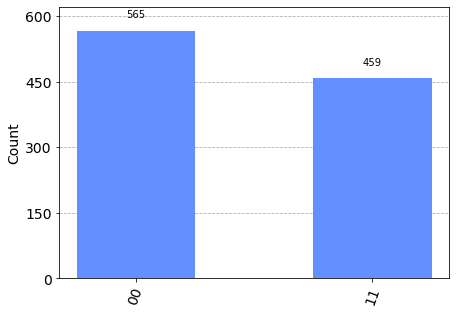

In [292]:
# Input: Ask the user to input two quantum states as arrays
user_input_q1 = input("Enter the first quantum state as an array (e.g., [a, b]): ")
user_input_q2 = input("Enter the second quantum state as an array (e.g., [c, d]): ")

# Convert the user input strings to lists
q1 = [float(x.strip()) for x in user_input_q1[1:-1].split(',')]
q2 = [float(x.strip()) for x in user_input_q2[1:-1].split(',')]

# Function Call with Input Quantum States
output_histogram = bell_states(q1, q2)

# Print or Visualize the Input Quantum States
print(f"Input Quantum State (Qubit 1): {q1}")
print(f"Input Quantum State (Qubit 2): {q2}")

# Display Histogram Plot of Measurement Results (Output)
output_histogram

In [270]:
def visualization_bell_state(q1, q2):
   
    # Create a quantum circuit with 2 qubits
    qc = QuantumCircuit(2)
    
    # Initialize the first qubit with the input quantum state q_1
    qc.initialize(q1, 0)
    
    # Initialize the second qubit with the input quantum state q_2
    qc.initialize(q2, 1)
    
    # Apply a Hadamard gate to the first qubit
    qc.h(0)
    
    # Apply a CNOT gate with the first qubit as the control and the second qubit as the target
    qc.cx(0, 1)
    
    state = Statevector(qc)
    
    return state

Enter the first quantum state as a comma-separated array (e.g., 1,0):  1,0
Enter the second quantum state as a comma-separated array (e.g., 0,1):  1,0


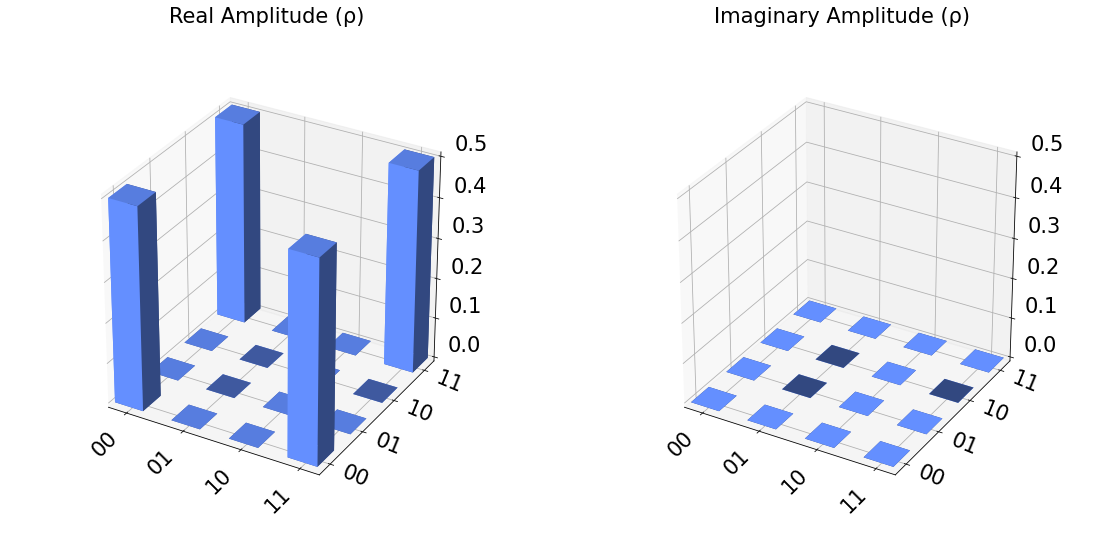

In [294]:
# User input to define quantum states as arrays
user_input_1 = input("Enter the first quantum state as a comma-separated array (e.g., 1,0): ").split(',')
user_input_2 = input("Enter the second quantum state as a comma-separated array (e.g., 0,1): ").split(',')

# Convert user input to numeric values
q_1 = [float(user_input_1[0]), float(user_input_1[1])]
q_2 = [float(user_input_2[0]), float(user_input_2[1])]

# Create and visualize Bell state using user-defined quantum states
bell_state = visualization_bell_state(q_1, q_2)

# Plot the state city of the Bell state
plot_state_city(bell_state)

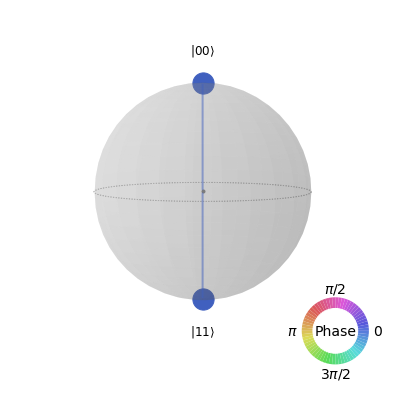

In [274]:
plot_state_qsphere(visualization_bell_state(qc_zero, qc_zero))

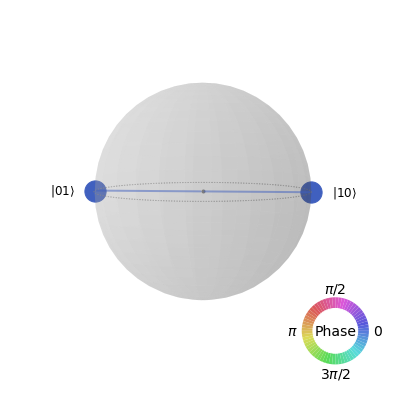

In [284]:
plot_state_qsphere(visualization_bell_state(qc_zero, qc_one))

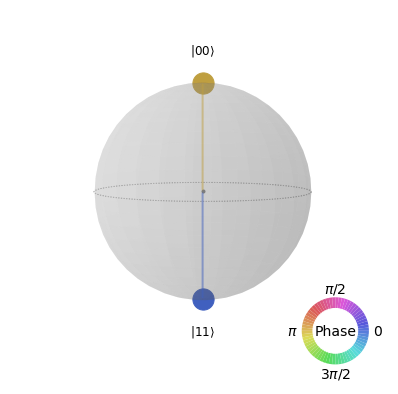

In [282]:
plot_state_qsphere(visualization_bell_state(qc_one, qc_zero))

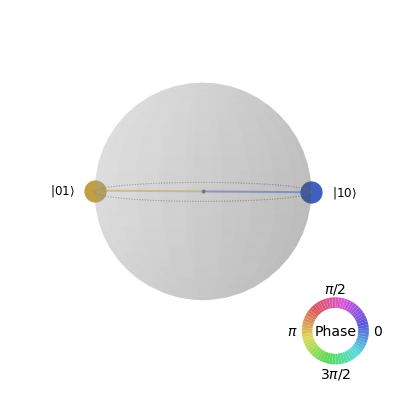

In [286]:
plot_state_qsphere(visualization_bell_state(qc_one, qc_one))